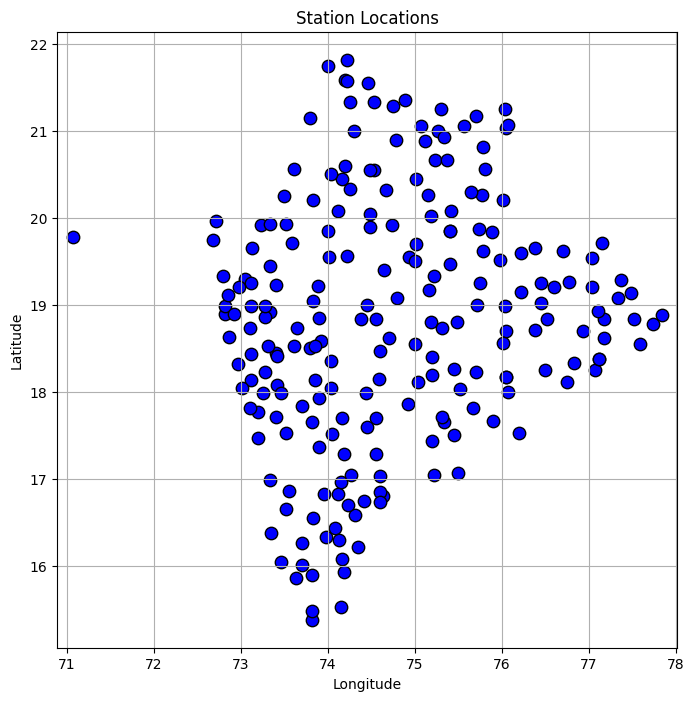

In [3]:
import os
import matplotlib.pyplot as plt

def ddmm_to_dd(coord_str):
    """Convert DDMM.M to DD.DD"""
    val = float(coord_str)
    degrees = int(val // 100)
    minutes = val - degrees * 100
    return degrees + minutes / 60

folder = "drive-download-20250702T130527Z-1-002\\per_station_data\\per_station_data"  # change to your folder path
files = [f for f in os.listdir(folder) if f.endswith('.csv')]

lats, lons = [], []

for f in files:
    parts = f[:-4].split('_')  # remove .csv and split
    if len(parts) < 3:
        continue
    lat_str, lon_str = parts[-2], parts[-1]
    if lat_str.startswith("9999") or lon_str.startswith("9999"):
        continue
    try:
        lat = ddmm_to_dd(lat_str)
        lon = ddmm_to_dd(lon_str)
    except Exception:
        continue
    lats.append(lat)
    lons.append(lon)

plt.figure(figsize=(8, 8))
plt.scatter(lons, lats, c='blue', s=80, edgecolor='k')
plt.title('Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.axis('equal')
plt.show()

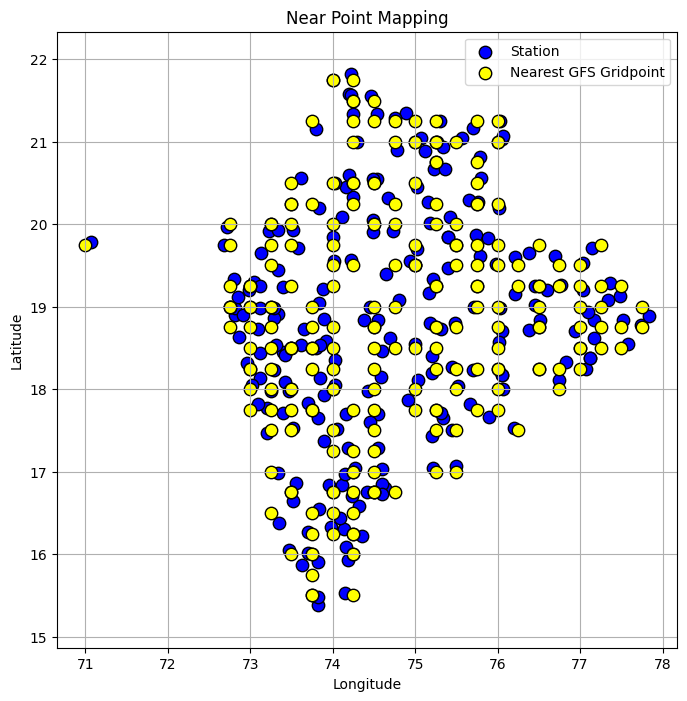

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np

def ddmm_to_dd(coord_str):
    """Convert DDMM.M to DD.DD"""
    val = float(coord_str)
    degrees = int(val // 100)
    minutes = val - degrees * 100
    return degrees + minutes / 60

folder = "drive-download-20250702T130527Z-1-002\\per_station_data\\per_station_data"  # change to your folder path
files = [f for f in os.listdir(folder) if f.endswith('.csv')]

lats, lons = [], []

for f in files:
    parts = f[:-4].split('_')  # remove .csv and split
    if len(parts) < 3:
        continue
    lat_str, lon_str = parts[-2], parts[-1]
    if lat_str.startswith("9999") or lon_str.startswith("9999"):
        continue
    try:
        lat = ddmm_to_dd(lat_str)
        lon = ddmm_to_dd(lon_str)
    except Exception:
        continue
    lats.append(lat)
    lons.append(lon)

# Find grid points (0.25 x 0.25) nearest to each station
def nearest_grid(val, grid_size=0.25):
    return round(round(val / grid_size) * grid_size, 2)

grid_lats = [nearest_grid(lat) for lat in lats]
grid_lons = [nearest_grid(lon) for lon in lons]

plt.figure(figsize=(8, 8))
plt.scatter(lons, lats, c='blue', s=80, edgecolor='k', label='Station')
plt.scatter(grid_lons, grid_lats, c='yellow', s=80, edgecolor='k', label='Nearest GFS Gridpoint')
plt.title('Near Point Mapping')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

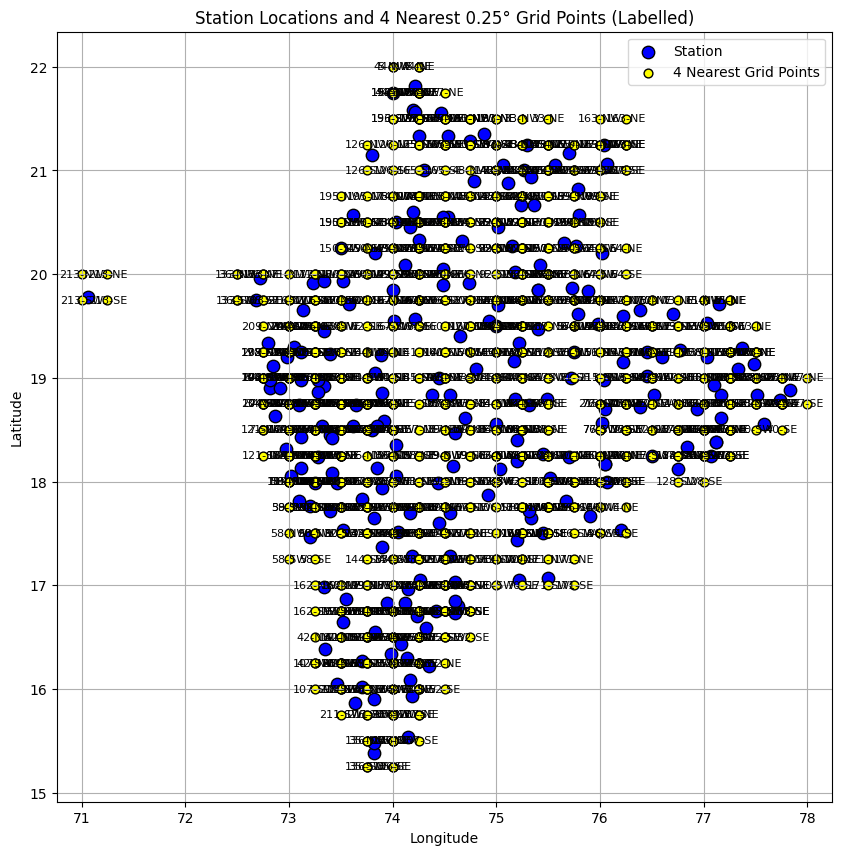

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np

def ddmm_to_dd(coord_str):
    """Convert DDMM.M to DD.DD"""
    val = float(coord_str)
    degrees = int(val // 100)
    minutes = val - degrees * 100
    return degrees + minutes / 60

folder = "drive-download-20250702T130527Z-1-002\\per_station_data\\per_station_data"  # change to your folder path
files = [f for f in os.listdir(folder) if f.endswith('.csv')]

lats, lons = [], []

for f in files:
    parts = f[:-4].split('_')  # remove .csv and split
    if len(parts) < 3:
        continue
    lat_str, lon_str = parts[-2], parts[-1]
    if lat_str.startswith("9999") or lon_str.startswith("9999"):
        continue
    try:
        lat = ddmm_to_dd(lat_str)
        lon = ddmm_to_dd(lon_str)
    except Exception:
        continue
    lats.append(lat)
    lons.append(lon)

# For each station, find the 4 nearest 0.25x0.25 grid points (SW, SE, NW, NE)
def four_nearest_grids(lat, lon, grid_size=0.25):
    lat_floor = (lat // grid_size) * grid_size
    lon_floor = (lon // grid_size) * grid_size
    grids = [
        (lat_floor, lon_floor),  # SW
        (lat_floor, lon_floor + grid_size),  # SE
        (lat_floor + grid_size, lon_floor),  # NW
        (lat_floor + grid_size, lon_floor + grid_size),  # NE
    ]
    return grids

grid_lats_all, grid_lons_all, grid_labels = [], [], []
for i, (lat, lon) in enumerate(zip(lats, lons)):
    grids = four_nearest_grids(lat, lon)
    for idx, (glat, glon) in enumerate(grids):
        grid_lats_all.append(glat)
        grid_lons_all.append(glon)
        grid_labels.append(f"{i+1}-{['SW','SE','NW','NE'][idx]}")

plt.figure(figsize=(10, 10))
plt.scatter(lons, lats, c='blue', s=80, edgecolor='k', label='Station')
plt.scatter(grid_lons_all, grid_lats_all, c='yellow', s=40, edgecolor='k', label='4 Nearest Grid Points')

# Label grid points
for x, y, label in zip(grid_lons_all, grid_lats_all, grid_labels):
    plt.text(x, y, label, fontsize=8, color='black', ha='center', va='center')

plt.title('Station Locations and 4 Nearest 0.25° Grid Points (Labelled)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

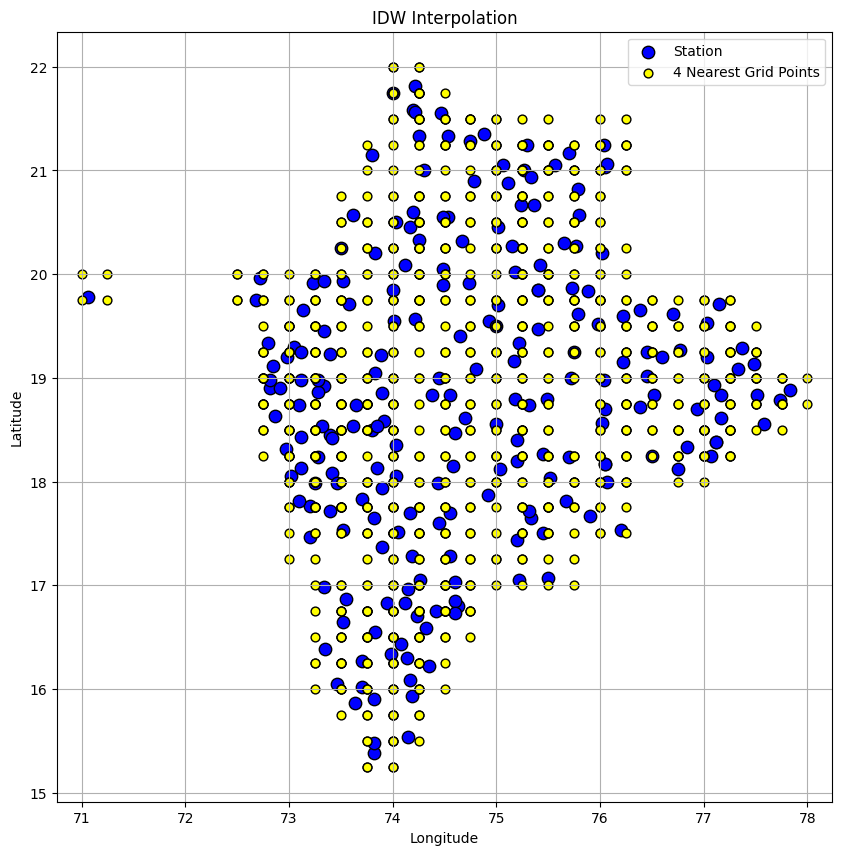

In [11]:
# ...existing code...
# For each station, find the 4 nearest 0.25x0.25 grid points (SW, SE, NW, NE)
def four_nearest_grids(lat, lon, grid_size=0.25):
    lat_floor = (lat // grid_size) * grid_size
    lon_floor = (lon // grid_size) * grid_size
    grids = [
        (lat_floor, lon_floor),  # SW
        (lat_floor, lon_floor + grid_size),  # SE
        (lat_floor + grid_size, lon_floor),  # NW
        (lat_floor + grid_size, lon_floor + grid_size),  # NE
    ]
    return grids

grid_lats_all, grid_lons_all = [], []
for lat, lon in zip(lats, lons):
    grids = four_nearest_grids(lat, lon)
    for glat, glon in grids:
        grid_lats_all.append(glat)
        grid_lons_all.append(glon)

plt.figure(figsize=(10, 10))
plt.scatter(lons, lats, c='blue', s=80, edgecolor='k', label='Station')
plt.scatter(grid_lons_all, grid_lats_all, c='yellow', s=40, edgecolor='k', label='4 Nearest Grid Points')
plt.title('IDW Interpolation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()
#

In [8]:
import os
import matplotlib.pyplot as plt

def ddmm_to_dd(coord_str):
    """Convert DDMM.M to DD.DD"""
    val = float(coord_str)
    degrees = int(val // 100)
    minutes = val - degrees * 100
    return degrees + minutes / 60

folder = "drive-download-20250702T130527Z-1-002\\per_station_data\\per_station_data"  # change to your folder path
files = [f for f in os.listdir(folder) if f.endswith('.csv')]

lats, lons = [], []

for f in files:
    parts = f[:-4].split('_')  # remove .csv and split
    if len(parts) < 3:
        continue
    lat_str, lon_str = parts[-2], parts[-1]
    if lat_str.startswith("9999") or lon_str.startswith("9999"):
        continue
    try:
        lat = ddmm_to_dd(lat_str)
        lon = ddmm_to_dd(lon_str)
    except Exception:
        continue
    lats.append(lat)
    lons.append(lon)

# For each station, find the 4 nearest 0.25x0.25 grid points (SW, SE, NW, NE)
def four_nearest_grids(lat, lon, grid_size=0.25):
    lat_floor = (lat // grid_size) * grid_size
    lon_floor = (lon // grid_size) * grid_size
    grids = [
        (lat_floor, lon_floor),  # SW
        (lat_floor, lon_floor + grid_size),  # SE
        (lat_floor + grid_size, lon_floor),  # NW
        (lat_floor + grid_size, lon_floor + grid_size),  # NE
    ]
    return grids

grid_lats_all, grid_lons_all = [], []
for lat, lon in zip(lats, lons):
    grids = four_nearest_grids(lat, lon)
    for glat, glon in grids:
        grid_lats_all.append(glat)
        grid_lons_all.append(glon)

plt.figure(figsize=(8, 8))import os
import matplotlib.pyplot as plt
import numpy as np

def ddmm_to_dd(coord_str):
    """Convert DDMM.M to DD.DD"""
    val = float(coord_str)
    degrees = int(val // 100)
    minutes = val - degrees * 100
    return degrees + minutes / 60

folder = "drive-download-20250702T130527Z-1-002\\per_station_data\\per_station_data"  # change to your folder path
files = [f for f in os.listdir(folder) if f.endswith('.csv')]

lats, lons = [], []

for f in files:
    parts = f[:-4].split('_')  # remove .csv and split
    if len(parts) < 3:
        continue
    lat_str, lon_str = parts[-2], parts[-1]
    if lat_str.startswith("9999") or lon_str.startswith("9999"):
        continue
    try:
        lat = ddmm_to_dd(lat_str)
        lon = ddmm_to_dd(lon_str)
    except Exception:
        continue
    lats.append(lat)
    lons.append(lon)

# For each station, find the 4 nearest 0.25x0.25 grid points (SW, SE, NW, NE)
def four_nearest_grids(lat, lon, grid_size=0.25):
    lat_floor = (lat // grid_size) * grid_size
    lon_floor = (lon // grid_size) * grid_size
    grids = [
        (lat_floor, lon_floor),  # SW
        (lat_floor, lon_floor + grid_size),  # SE
        (lat_floor + grid_size, lon_floor),  # NW
        (lat_floor + grid_size, lon_floor + grid_size),  # NE
    ]
    return grids

grid_lats_all, grid_lons_all, grid_labels = [], [], []
for i, (lat, lon) in enumerate(zip(lats, lons)):
    grids = four_nearest_grids(lat, lon)
    for idx, (glat, glon) in enumerate(grids):
        grid_lats_all.append(glat)
        grid_lons_all.append(glon)
        grid_labels.append(f"{i+1}-{['SW','SE','NW','NE'][idx]}")

plt.figure(figsize=(10, 10))
plt.scatter(lons, lats, c='blue', s=80, edgecolor='k', label='Station')
plt.scatter(grid_lons_all, grid_lats_all, c='yellow', s=40, edgecolor='k', label='4 Nearest Grid Points')

# Label grid points
for x, y, label in zip(grid_lons_all, grid_lats_all, grid_labels):
    plt.text(x, y, label, fontsize=8, color='black', ha='center', va='center')

plt.title('Station Locations and 4 Nearest 0.25° Grid Points (Labelled)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()
plt.scatter(lons, lats, c='blue', s=80, edgecolor='k', label='Station')
plt.scatter(grid_lons_all, grid_lats_all, c='yellow', s=40, edgecolor='k', label='4 Nearest Grid Points')
plt.title('Station Locations and 4 Nearest 0.25° Grid Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

SyntaxError: invalid syntax (2201280069.py, line 50)

/tmp/ipykernel_8027/1303527886.py:5: DtypeWarning: Columns (186) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_training_data.csv")


TypeError: text() missing 1 required positional argument: 's'

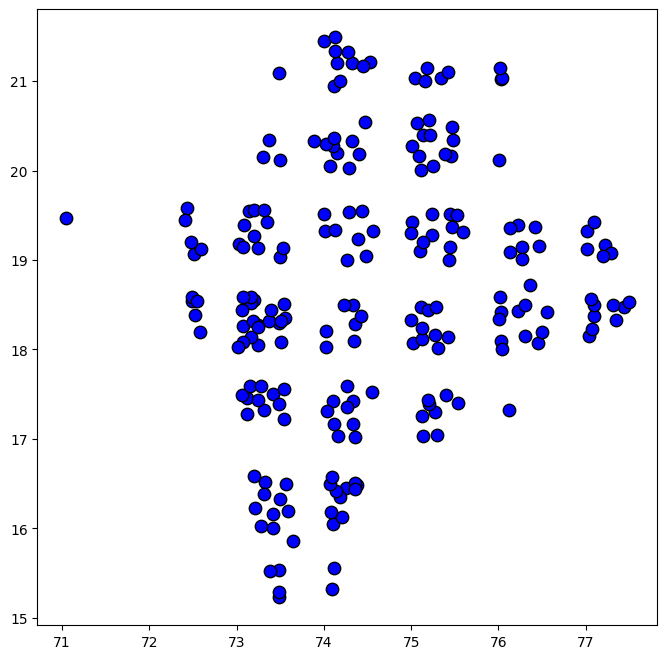

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Example dataframe with station lon and lat (possibly with duplicates
df = pd.read_csv("final_training_data.csv")

# Drop duplicate lat-lon pairs
unique_coords = df.drop_duplicates(subset=['station_lon', 'station_lat'])

# Plot unique station locations
plt.figure(figsize=(8, 8))
plt.scatter(unique_coords['station_lon'], unique_coords['station_lat'], c='blue', s=80, edgecolor='k')

# Optional: annotate points with their station names (first occurrence only)
for idx, row in unique_coords.iterrows():
    plt.text(row['station_lon'] + 0.02, row['station_lat'],  fontsize=9)

plt.title('Unique Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.axis('equal')
plt.show()


KeyError: 'station_name'

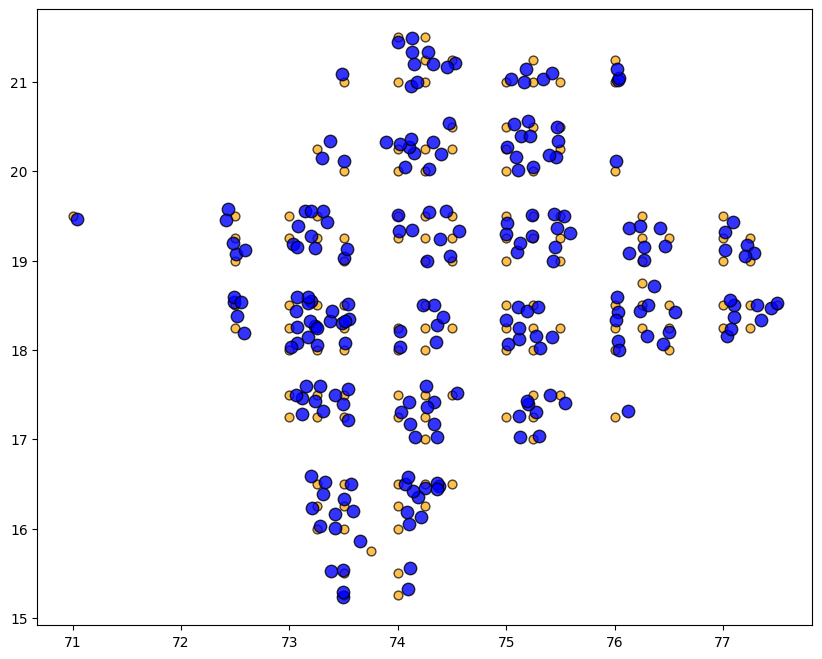

In [ ]:
# Drop duplicates for stations and grid points separately
unique_stations = df.drop_duplicates(subset=['station_lon', 'station_lat'])
unique_grids = df.drop_duplicates(subset=['grid_lon', 'grid_lat'])

plt.figure(figsize=(10, 8))

# Plot grid points
plt.scatter(unique_grids['grid_lon'], unique_grids['grid_lat'], 
            c='orange', s=40, label='Grid Points', alpha=0.7, edgecolor='k')

# Plot station points
plt.scatter(unique_stations['station_lon'], unique_stations['station_lat'], 
            c='blue', s=80, label='Stations', alpha=0.8, edgecolor='k')

# Annotate station names
for idx, row in unique_stations.iterrows():
    plt.text(row['station_lon'] + 0.02, row['station_lat'], row['station_name'], fontsize=9)

plt.title('Stations and Grid Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

In [1]:
import os
import pandas as pd

def find_and_sort_missing_dates_jul_to_oct(folder_path="per_station_data"):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv') ]
    
    missing_dates_dict = {}
    
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path, parse_dates=['Date'])
        df = df.sort_values('Date')
        
        # Filter only dates in Jul, Aug, Sep, Oct from the entire date range in file
        # First get full range for those months between min and max date in df
        min_date = df['Date'].min()
        max_date = df['Date'].max()
        
        full_date_range = pd.date_range(start=min_date, end=max_date)
        # Filter full date range for months 7,8,9,10 only
        full_date_range = full_date_range[full_date_range.month.isin([6,7,8,9])]
        
        # Filter df dates for those months as well
        df_filtered = df[df['Date'].dt.month.isin([6,7,8,9])]
        
        missing_dates = full_date_range.difference(df_filtered['Date'])
        
        missing_dates_dict[csv_file] = len(missing_dates)
    
    # Sort filenames by count of missing dates ascending
    sorted_files = sorted(missing_dates_dict.items(), key=lambda x: x[1])
    
    for filename, missing_count in sorted_files:
        print(f"{filename}: {missing_count} missing dates")
    
    no_missing_count = sum(1 for v in missing_dates_dict.values() if v == 0)
    print(f"\nNumber of files without any missing dates (in Jul-Oct): {no_missing_count}")

# Run it
find_and_sort_missing_dates_jul_to_oct()


UDGIR_1823.0_7707.0.csv: 0 missing dates
DHARMABAD_1853.0_7750.0.csv: 0 missing dates
VITA_1717.0_7433.0.csv: 0 missing dates
SUDHAGAD_PALI_1832.0_7319.0.csv: 0 missing dates
SHOLAPUR_-_IMD_OBSY_1740.0_7554.0.csv: 0 missing dates
MALVAN_1603.0_7328.0.csv: 0 missing dates
GHANSAWANGI_1931.0_7559.0.csv: 0 missing dates
POLADPUR_1759.0_7328.0.csv: 0 missing dates
MAHABALESHWAR-_IMD_OBSY_1750.0_7342.0.csv: 0 missing dates
AKKALKUWA_2145.0_7400.0.csv: 0 missing dates
GIRNADAM_-_FMO_9999.0_9999.0.csv: 0 missing dates
JAFRABAD_2012.0_7601.0.csv: 0 missing dates
KUNDEWADI_AGRI_9999.0_9999.0.csv: 0 missing dates
DODAMARG_9999.0_9999.0.csv: 0 missing dates
RAVER_2115.0_7602.0.csv: 0 missing dates
DONDAICHA_2120.0_7432.0.csv: 0 missing dates
HARSUL_-_FMO_9999.0_9999.0.csv: 0 missing dates
VANI-ARG_2033.0_7389.0.csv: 0 missing dates
KHUTBAV_DAUND_AWS_1850.0_7433.0.csv: 0 missing dates
RATNAGIRI_-_IMD_OBSY_1659.0_7320.0.csv: 0 missing dates
SHAHUWADI_1650.0_7357.0.csv: 0 missing dates
TALODA_2134.0

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_lat_lon(filename):
    base = os.path.basename(filename).replace('.csv', '')
    parts = base.split('_')
    
    try:
        lat_str = parts[-2]
        lon_str = parts[-1]

        def convert(coord_str):
            val = float(coord_str)
            degrees = int(val // 100)
            minutes = val - degrees * 100
            return round(degrees + minutes / 60, 4)

        return convert(lat_str), convert(lon_str)
    except Exception as e:
        print(f"Error parsing filename {filename}: {e}")
        return None, None


def print_files_no_missing_dates_jun_to_sep(folder_path="per_station_data"):
    full_date_range = pd.date_range(start='2019-05-01', end='2024-10-31')
    full_date_range = full_date_range[full_date_range.month.isin([6,7,8,9])]
    
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv') and '9999' not in f]
    
    lat_lon_list = []

    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path, parse_dates=['Date'])

        df_filtered = df[df['Date'].dt.month.isin([6,7,8,9])]
        df_dates = df_filtered['Date']
        missing_dates = full_date_range.difference(df_dates)

        if len(missing_dates) == 0:
            lat, lon = extract_lat_lon(csv_file)
            if lat is not None and lon is not None:
                lat_lon_list.append((csv_file, lat, lon))

    print("Files with NO missing dates from June to September (2019–2024):")
    for f, lat, lon in lat_lon_list:
        print(f"{f}: lat={lat}, lon={lon}")
    
    print(f"\nTotal files with no missing dates: {len(lat_lon_list)}")
    return lat_lon_list

def search_and_plot(lat_lon_list, combined_csv_path):
    df_combined = pd.read_csv(combined_csv_path)
    
    found_points = []

    for _, lat, lon in lat_lon_list:
        match = df_combined[
            (df_combined['station_lat'].round(4) == round(lat, 4)) &
            (df_combined['station_lon'].round(4) == round(lon, 4))
        ]
        if not match.empty:
            found_points.append((lat, lon))

    if found_points:
        lats, lons = zip(*found_points)
        plt.figure(figsize=(8, 6))
        plt.scatter(lons, lats, c='blue', marker='o')
        plt.title('Stations with No Missing Dates (Jun–Sep, 2019–2024)')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.grid(True)
        plt.show()
    else:
        print("No matching coordinates found in combined CSV.")

# Run
lat_lon_list = print_files_no_missing_dates_jun_to_sep("per_station_data")
search_and_plot(lat_lon_list, "final_training_data.csv")


Files with NO missing dates from June to September (2019–2024):
DHARMABAD_1853.0_7750.0.csv: lat=18.8833, lon=77.8333
SUDHAGAD_PALI_1832.0_7319.0.csv: lat=18.5333, lon=73.3167
SHOLAPUR_-_IMD_OBSY_1740.0_7554.0.csv: lat=17.6667, lon=75.9
MALVAN_1603.0_7328.0.csv: lat=16.05, lon=73.4667
GHANSAWANGI_1931.0_7559.0.csv: lat=19.5167, lon=75.9833
POLADPUR_1759.0_7328.0.csv: lat=17.9833, lon=73.4667
MAHABALESHWAR-_IMD_OBSY_1750.0_7342.0.csv: lat=17.8333, lon=73.7
AKKALKUWA_2145.0_7400.0.csv: lat=21.75, lon=74.0
JAFRABAD_2012.0_7601.0.csv: lat=20.2, lon=76.0167
RAVER_2115.0_7602.0.csv: lat=21.25, lon=76.0333
RATNAGIRI_-_IMD_OBSY_1659.0_7320.0.csv: lat=16.9833, lon=73.3333
SHAHUWADI_1650.0_7357.0.csv: lat=16.8333, lon=73.95
TALODA_2134.0_7413.0.csv: lat=21.5667, lon=74.2167
SANTACRUZ_-_IMD_OBSY_1907.0_7251.0.csv: lat=19.1167, lon=72.85
KUDAL_1601.0_7342.0.csv: lat=16.0167, lon=73.7
PARTUR_1936.0_7613.0.csv: lat=19.6, lon=76.2167
HINGOLI_-_HYDROMET_1943.0_7709.0.csv: lat=19.7167, lon=77.15
BHOKAR

/tmp/ipykernel_8064/12226241.py:54: DtypeWarning: Columns (186) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combined = pd.read_csv(combined_csv_path)


In [ ]:
# what is lat_lon_list?
# lat_lon_list is a list of tuples containing filenames and their corresponding latitude and longitude values

In [6]:
print(lat_lon_list)

[('DHARMABAD_1853.0_7750.0.csv', 18.8833, 77.8333), ('SUDHAGAD_PALI_1832.0_7319.0.csv', 18.5333, 73.3167), ('SHOLAPUR_-_IMD_OBSY_1740.0_7554.0.csv', 17.6667, 75.9), ('MALVAN_1603.0_7328.0.csv', 16.05, 73.4667), ('GHANSAWANGI_1931.0_7559.0.csv', 19.5167, 75.9833), ('POLADPUR_1759.0_7328.0.csv', 17.9833, 73.4667), ('MAHABALESHWAR-_IMD_OBSY_1750.0_7342.0.csv', 17.8333, 73.7), ('AKKALKUWA_2145.0_7400.0.csv', 21.75, 74.0), ('JAFRABAD_2012.0_7601.0.csv', 20.2, 76.0167), ('RAVER_2115.0_7602.0.csv', 21.25, 76.0333), ('RATNAGIRI_-_IMD_OBSY_1659.0_7320.0.csv', 16.9833, 73.3333), ('SHAHUWADI_1650.0_7357.0.csv', 16.8333, 73.95), ('TALODA_2134.0_7413.0.csv', 21.5667, 74.2167), ('SANTACRUZ_-_IMD_OBSY_1907.0_7251.0.csv', 19.1167, 72.85), ('KUDAL_1601.0_7342.0.csv', 16.0167, 73.7), ('PARTUR_1936.0_7613.0.csv', 19.6, 76.2167), ('HINGOLI_-_HYDROMET_1943.0_7709.0.csv', 19.7167, 77.15), ('BHOKARDAN_2016.0_7546.0.csv', 20.2667, 75.7667), ('MHASLA_1808.0_7307.0.csv', 18.1333, 73.1167), ('KHALAPUR_1852.0_731

In [7]:
import os
import pandas as pd

def get_lat_lon_with_complete_data(folder_path):
    full_range = pd.date_range("2019-06-01", "2024-09-30")
    full_range = full_range[full_range.month.isin([6, 7, 8, 9])]
    
    complete_lat_lon = []
    
    files = [f for f in os.listdir(folder_path) if f.endswith(".csv") and "9999" not in f]
    
    for f in files:
        path = os.path.join(folder_path, f)
        try:
            df = pd.read_csv(path, parse_dates=["Date"])
        except Exception as e:
            print(f"Error reading {f}: {e}")
            continue
        
        df = df[df['Date'].dt.month.isin([6, 7, 8, 9])]
        df = df[(df['Date'].dt.year >= 2019) & (df['Date'].dt.year <= 2024)]
        present_dates = pd.to_datetime(df['Date'].unique())
        
        missing = full_range.difference(present_dates)
        if len(missing) == 0:
            try:
                parts = f.split("_")
                lat_raw = parts[-2].replace('.0', '')  # Remove trailing .0
                lon_raw = parts[-1].replace('.csv', '').replace('.0', '')  # Remove trailing .0 and .csv
                
                lat_str = lat_raw[:2] + '.' + lat_raw[2:]
                lon_str = lon_raw[:2] + '.' + lon_raw[2:]
                
                complete_lat_lon.append((lat_str, lon_str))
            except Exception as e:
                print(f"Filename parsing failed for {f}: {e}")
    
    return complete_lat_lon

# Usage
lat_lon_complete = get_lat_lon_with_complete_data("per_station_data")
for lat, lon in lat_lon_complete:
    print(f"({lat}, {lon})")

print(f"\nTotal complete stations: {len(lat_lon_complete)}")


(18.53, 77.50)
(18.32, 73.19)
(17.40, 75.54)
(16.03, 73.28)
(19.31, 75.59)
(17.59, 73.28)
(17.50, 73.42)
(21.45, 74.00)
(20.12, 76.01)
(21.15, 76.02)
(16.59, 73.20)
(16.50, 73.57)
(21.34, 74.13)
(19.07, 72.51)
(16.01, 73.42)
(19.36, 76.13)
(19.43, 77.09)
(20.16, 75.46)
(18.08, 73.07)
(18.52, 73.17)
(18.44, 73.06)
(18.14, 73.17)
(19.39, 76.23)
(18.03, 73.01)
(20.56, 75.20)
(18.54, 72.55)
(19.47, 71.04)
(18.54, 72.49)
(18.19, 72.58)
(19.34, 74.13)

Total complete stations: 30


In [8]:
def create_subsets_from_lat_lon(combined_df, lat_lon_list):
    subsets = {}
    for lat_str, lon_str in lat_lon_list:
        # Convert strings to floats for matching
        lat = float(lat_str)
        lon = float(lon_str)
        
        subset_df = combined_df[(combined_df['station_lat'] == lat) & (combined_df['station_lon'] == lon)]
        
        if not subset_df.empty:
            subsets[(lat, lon)] = subset_df
    
    return subsets
combined_df = pd.read_csv("final_training_data.csv")

subset_dfs = create_subsets_from_lat_lon(combined_df, lat_lon_complete)

# Print summary
print(f"Created subsets for {len(subset_dfs)} lat-lon pairs.")

# To access the subset for a particular lat, lon, e.g.:
# subset_dfs[(18.54, 72.49)].head()
folder = "full_data_subsets"
os.makedirs(folder, exist_ok=True)

for (lat, lon), df_subset in subset_dfs.items():
    filename = os.path.join(folder, f"subset_{lat}_{lon}.csv")
    df_subset.to_csv(filename, index=False)
    print(f"Saved {filename}")


/tmp/ipykernel_8064/1910757390.py:14: DtypeWarning: Columns (186) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv("final_training_data.csv")


Created subsets for 30 lat-lon pairs.
Saved full_data_subsets/subset_18.53_77.5.csv
Saved full_data_subsets/subset_18.32_73.19.csv
Saved full_data_subsets/subset_17.4_75.54.csv
Saved full_data_subsets/subset_16.03_73.28.csv
Saved full_data_subsets/subset_19.31_75.59.csv
Saved full_data_subsets/subset_17.59_73.28.csv
Saved full_data_subsets/subset_17.5_73.42.csv
Saved full_data_subsets/subset_21.45_74.0.csv
Saved full_data_subsets/subset_20.12_76.01.csv
Saved full_data_subsets/subset_21.15_76.02.csv
Saved full_data_subsets/subset_16.59_73.2.csv
Saved full_data_subsets/subset_16.5_73.57.csv
Saved full_data_subsets/subset_21.34_74.13.csv
Saved full_data_subsets/subset_19.07_72.51.csv
Saved full_data_subsets/subset_16.01_73.42.csv
Saved full_data_subsets/subset_19.36_76.13.csv
Saved full_data_subsets/subset_19.43_77.09.csv
Saved full_data_subsets/subset_20.16_75.46.csv
Saved full_data_subsets/subset_18.08_73.07.csv
Saved full_data_subsets/subset_18.52_73.17.csv
Saved full_data_subsets/subs

In [38]:
for (lat, lon), df_subset in subset_dfs.items():
    length = len(df_subset)
    has_missing = df_subset.isnull().values.any()
    print(f"Subset ({lat}, {lon}): Rows = {length}, Missing values = {has_missing}")


Subset (18.53, 77.5): Rows = 701, Missing values = False
Subset (18.32, 73.19): Rows = 701, Missing values = False
Subset (17.4, 75.54): Rows = 701, Missing values = False
Subset (16.03, 73.28): Rows = 701, Missing values = False
Subset (19.31, 75.59): Rows = 701, Missing values = False
Subset (17.59, 73.28): Rows = 701, Missing values = False
Subset (17.5, 73.42): Rows = 701, Missing values = False
Subset (21.45, 74.0): Rows = 701, Missing values = False
Subset (20.12, 76.01): Rows = 701, Missing values = False
Subset (21.15, 76.02): Rows = 701, Missing values = False
Subset (16.59, 73.2): Rows = 701, Missing values = False
Subset (16.5, 73.57): Rows = 701, Missing values = False
Subset (21.34, 74.13): Rows = 701, Missing values = False
Subset (19.07, 72.51): Rows = 701, Missing values = False
Subset (16.01, 73.42): Rows = 701, Missing values = False
Subset (19.36, 76.13): Rows = 701, Missing values = False
Subset (19.43, 77.09): Rows = 701, Missing values = False
Subset (20.16, 75.46

In [30]:
print(lat_lon_list)

[(1853.0, 7750.0), (1832.0, 7319.0), (1740.0, 7554.0), (1603.0, 7328.0), (1931.0, 7559.0), (1759.0, 7328.0), (1750.0, 7342.0), (2145.0, 7400.0), (2012.0, 7601.0), (2115.0, 7602.0), (1659.0, 7320.0), (1650.0, 7357.0), (2134.0, 7413.0), (1907.0, 7251.0), (1601.0, 7342.0), (1936.0, 7613.0), (1943.0, 7709.0), (2016.0, 7546.0), (1808.0, 7307.0), (1852.0, 7317.0), (1844.0, 7306.0), (1814.0, 7317.0), (1939.0, 7623.0), (1803.0, 7301.0), (2056.0, 7520.0), (1854.0, 7255.0), (1947.0, 7104.0), (1854.0, 7249.0), (1819.0, 7258.0), (1934.0, 7413.0)]


In [16]:
import os
import pandas as pd

def print_files_no_missing_dates_jun_to_sep(folder_path="output_features"):
    # Full date range fixed from 2019-01-01 to 2024-12-31
    full_date_range = pd.date_range(start='2019-5-01', end='2024-10-31')
    # Filter only June, July, August, September
    full_date_range = full_date_range[full_date_range.month.isin([6,7,8,9])]
    
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv') and '9999' not in f]
    
    no_missing_files = []
    
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path, parse_dates=['date'])
        
        # Filter only dates in June to September
        df_filtered = df[df['date'].dt.month.isin([6,7,8,9])]
        
        # Get unique dates present in the file for those months and years 2019-2024
        df_dates = df_filtered['date']
        
        # Find missing dates compared to full range
        missing_dates = full_date_range.difference(df_dates)
        
        if len(missing_dates) == 0:
            no_missing_files.append(csv_file)
    
    print("Files with NO missing dates from June to September (2019-2024):")
    for f in no_missing_files:
        print(f)
    print(f"\nTotal files with no missing dates: {len(no_missing_files)}")

# Run the function
print_files_no_missing_dates_jun_to_sep()


Files with NO missing dates from June to September (2019-2024):

Total files with no missing dates: 0
